In [64]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

In [65]:
# read file
filename = os.path.join(os.getcwd(), "US_youtube_trending_data.csv")
df = pd.read_csv(filename)
df.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12T00:00:00Z,Professor injury|professor achilles|professor ...,949491,77487,746,7506,https://i.ytimg.com/vi/w-aidBdvZo8/default.jpg,False,False,Subscribe To My Channel - https://www.youtube....
6,uet14uf9NsE,OUR FIRST FAMILY INTRO!!,2020-08-12T00:17:41Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2020-08-12T00:00:00Z,[None],470446,47990,440,4558,https://i.ytimg.com/vi/uet14uf9NsE/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...
7,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12T00:00:00Z,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,https://i.ytimg.com/vi/SnsPZj91R7E/default.jpg,False,False,"Since I was little, i've had these goals for m..."
9,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113983,4373,5618,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...


In [66]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268787 entries, 0 to 268786
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           268787 non-null  object
 1   title              268787 non-null  object
 2   publishedAt        268787 non-null  object
 3   channelId          268787 non-null  object
 4   channelTitle       268787 non-null  object
 5   categoryId         268787 non-null  int64 
 6   trending_date      268787 non-null  object
 7   tags               268787 non-null  object
 8   view_count         268787 non-null  int64 
 9   likes              268787 non-null  int64 
 10  dislikes           268787 non-null  int64 
 11  comment_count      268787 non-null  int64 
 12  thumbnail_link     268787 non-null  object
 13  comments_disabled  268787 non-null  bool  
 14  ratings_disabled   268787 non-null  bool  
 15  description        264238 non-null  object
dtypes: bool(2), int64(5)

,categoryId,view_count,likes,dislikes,comment_count
count,268787.000000,2.687870e+05,2.687870e+05,268787.000000,2.687870e+05
mean,18.743511,2.734467e+06,1.314697e+05,1134.277495,1.014303e+04
std,6.786562,9.794087e+06,4.539469e+05,8047.291315,7.260853e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.725410e+05,1.796300e+04,0.000000,1.280000e+03
50%,20.000000,9.368710e+05,4.020500e+04,0.000000,2.754000e+03
75%,24.000000,2.106178e+06,9.877300e+04,467.000000,6.386000e+03
max,29.000000,1.407644e+09,1.602153e+07,879354.000000,6.738537e+06


In [67]:
# check missing values
df.isna().sum()


video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4549
dtype: int64

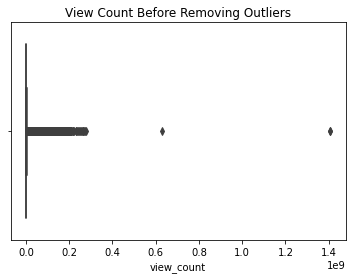

In [68]:
# view count before removing outliers
sns.boxplot(x=df['view_count'])
plt.title('View Count Before Removing Outliers')
plt.show()

In [69]:
# get rid of outliers (using IQR)

Q1 = df['view_count'].quantile(0.25)
Q3 = df['view_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[(df['view_count'] >= lower_bound) & (df['view_count'] <= upper_bound)]

# can alternatively set a threshold ?
# max_threshold = df['view_count'].quantile(0.9)
# df['views'] = df['view_count'].apply(lambda x: min(x, max_threshold))

# normalize numeric features (views, likes, comments) ?

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268782,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08T15:55:44Z,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,25,2024-04-15T00:00:00Z,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,False,False,Millions of people in the United States are tr...
268783,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04T11:00:02Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2024-04-15T00:00:00Z,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ..."
268784,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07T14:53:25Z,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,2024-04-15T00:00:00Z,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...
268785,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07T18:00:03Z,UChQ-d14tHB62nskossxO0tw,Joe Fazer,24,2024-04-15T00:00:00Z,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...


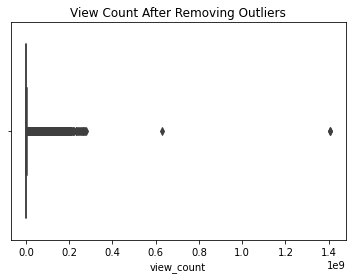

In [70]:
# view count after removing outliers
sns.boxplot(x=df['view_count'])
plt.title('View Count After Removing Outliers')
plt.show()

In [71]:
# create new engagement metrics
df['likability'] = df['likes'] / df['view_count']
df['commentability'] = df['comment_count'] / df['view_count']

In [72]:
df.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,likability,commentability
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,0.103596,0.023315
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",0.061611,0.006948
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,0.173523,0.019727
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,0.046804,0.015393
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,0.040753,0.001954


In [73]:
# add a column showing the number of days the video has already been trending
num_prev_days_trending = df['previous_trend_count'] = df.groupby('video_id').cumcount()
num_prev_days_trending

0         0
1         0
2         0
3         0
4         0
         ..
268782    5
268783    9
268784    6
268785    6
268786    8
Length: 268787, dtype: int64

In [74]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

# sort df by video_id and trending_date
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df = df.sort_values(by=['video_id', 'trending_date'], ascending=[True, True])

# engagement growth rate over time of videos trending over multiple days
df['view_growth_rate'] = df.groupby('video_id')['view_count'].pct_change().fillna(0)
df['like_growth_rate'] = df.groupby('video_id')['likes'].pct_change().fillna(0)
df['comment_growth_rate'] = df.groupby('video_id')['comment_count'].pct_change().fillna(0)


In [75]:
df.head(100)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,likability,commentability,previous_trend_count,view_growth_rate,like_growth_rate,comment_growth_rate
60792,--14w5SOEUs,Migos - Avalanche,2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,1076217,122830,...,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,Music video by Migos performing Avalanche. Qua...,0.114131,0.008863,0,0.000000,0.000000,0.000000
60991,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,2146104,167034,...,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,Watch the the official video for Migos - Avala...,0.077831,0.006057,1,0.994118,0.359880,0.362617
61197,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3317372,202153,...,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,Watch the the official video for Migos - Avala...,0.060938,0.004438,2,0.545765,0.210251,0.132559
61398,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3963014,218568,...,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,Watch the the official video for Migos - Avala...,0.055152,0.003897,3,0.194625,0.081201,0.048978
61605,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,4690242,232455,...,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,Watch the the official video for Migos - Avala...,0.049561,0.003357,4,0.183504,0.063536,0.019492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120181,-0Se57MuiL8,Warhammer: The Horus Heresy Cinematic Trailer,2022-03-24 02:57:33+00:00,UCwdh3MTrFq3sXlB4ct8B-Fg,Warhammer,20,NaT,40k|aos|black library|chris peach|citadel mini...,1449292,83924,...,https://i.ytimg.com/vi/-0Se57MuiL8/default.jpg,True,False,"Watch massive armies fight, the Warmaster live...",0.057907,0.000000,5,0.039946,0.022092,0.000000
211429,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,5734915,265404,...,https://i.ytimg.com/vi/-0YWQULsQcE/default.jpg,False,False,00:00 Presentación y entradas06:14 Round 110:1...,0.046279,0.001506,0,0.000000,0.000000,0.000000
211660,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,6513435,289885,...,https://i.ytimg.com/vi/-0YWQULsQcE/default.jpg,False,False,00:00 Presentación y entradas06:14 Round 110:1...,0.044506,0.001431,1,0.135751,0.092241,0.079328
211887,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,6911991,300869,...,https://i.ytimg.com/vi/-0YWQULsQcE/default.jpg,False,False,¡Consigue las gafas de Ibai de La Velada y llé...,0.043529,0.001397,2,0.061190,0.037891,0.036052


In [76]:
df['publish_hour'] = df['publishedAt'].dt.hour
df['is_weekend'] = df['publishedAt'].dt.dayofweek > 5

In [77]:
df.head(100)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,likability,commentability,previous_trend_count,view_growth_rate,like_growth_rate,comment_growth_rate,publish_hour,is_weekend
60792,--14w5SOEUs,Migos - Avalanche,2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,1076217,122830,...,False,Music video by Migos performing Avalanche. Qua...,0.114131,0.008863,0,0.000000,0.000000,0.000000,16,False
60991,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,2146104,167034,...,False,Watch the the official video for Migos - Avala...,0.077831,0.006057,1,0.994118,0.359880,0.362617,16,False
61197,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3317372,202153,...,False,Watch the the official video for Migos - Avala...,0.060938,0.004438,2,0.545765,0.210251,0.132559,16,False
61398,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3963014,218568,...,False,Watch the the official video for Migos - Avala...,0.055152,0.003897,3,0.194625,0.081201,0.048978,16,False
61605,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,4690242,232455,...,False,Watch the the official video for Migos - Avala...,0.049561,0.003357,4,0.183504,0.063536,0.019492,16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120181,-0Se57MuiL8,Warhammer: The Horus Heresy Cinematic Trailer,2022-03-24 02:57:33+00:00,UCwdh3MTrFq3sXlB4ct8B-Fg,Warhammer,20,NaT,40k|aos|black library|chris peach|citadel mini...,1449292,83924,...,False,"Watch massive armies fight, the Warmaster live...",0.057907,0.000000,5,0.039946,0.022092,0.000000,2,False
211429,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,5734915,265404,...,False,00:00 Presentación y entradas06:14 Round 110:1...,0.046279,0.001506,0,0.000000,0.000000,0.000000,19,False
211660,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,6513435,289885,...,False,00:00 Presentación y entradas06:14 Round 110:1...,0.044506,0.001431,1,0.135751,0.092241,0.079328,19,False
211887,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,6911991,300869,...,False,¡Consigue las gafas de Ibai de La Velada y llé...,0.043529,0.001397,2,0.061190,0.037891,0.036052,19,False


In [78]:
df['tag_count'] = df['tags'].apply(lambda x: len(str(x).split('|')))

In [79]:
df.head(50)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,description,likability,commentability,previous_trend_count,view_growth_rate,like_growth_rate,comment_growth_rate,publish_hour,is_weekend,tag_count
60792,--14w5SOEUs,Migos - Avalanche,2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,1076217,122830,...,Music video by Migos performing Avalanche. Qua...,0.114131,0.008863,0,0.000000,0.000000,0.000000,16,False,8
60991,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,2146104,167034,...,Watch the the official video for Migos - Avala...,0.077831,0.006057,1,0.994118,0.359880,0.362617,16,False,8
61197,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3317372,202153,...,Watch the the official video for Migos - Avala...,0.060938,0.004438,2,0.545765,0.210251,0.132559,16,False,8
61398,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3963014,218568,...,Watch the the official video for Migos - Avala...,0.055152,0.003897,3,0.194625,0.081201,0.048978,16,False,8
61605,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,4690242,232455,...,Watch the the official video for Migos - Avala...,0.049561,0.003357,4,0.183504,0.063536,0.019492,16,False,8
61818,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,5167987,240113,...,Watch the the official video for Migos - Avala...,0.046462,0.003143,5,0.101859,0.032944,0.031633,16,False,8
62030,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,5726392,247336,...,Watch the the official video for Migos - Avala...,0.043192,0.002775,6,0.108051,0.030082,-0.021612,16,False,8
62243,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,6078723,252005,...,Watch the the official video for Migos - Avala...,0.041457,0.002670,7,0.061528,0.018877,0.021271,16,False,8
62481,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,6553613,258885,...,Watch the the official video for Migos - Avala...,0.039503,0.002487,8,0.078123,0.027301,0.004190,16,False,8
62681,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,6823249,262692,...,Watch the the official video for Migos - Avala...,0.038500,0.002410,9,0.041143,0.014705,0.009143,16,False,8


In [80]:
# one-hot encode category IDs
df = pd.get_dummies(df, columns=['categoryId'])

In [ ]:
df.head(50)

In [1]:
pip install gensim nltk pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
# WORD2VEC -- word embedding for titles (do descriptions later)

import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lauren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lauren/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Load the dataset
df = pd.read_csv('US_youtube_trending_data.csv')

# Extract relevant columns (titles and descriptions)
df_text = df[['title', 'description']].dropna()

# Preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word.isalpha()]  # Keep only alphabetic tokens
    stop_words = set(stopwords.words('english'))  # Define stopwords
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens


# Apply cleaning to both title and description
df_text['cleaned_title'] = df_text['title'].apply(preprocess_text)
df_text['cleaned_description'] = df_text['description'].apply(preprocess_text)

In [12]:
df_text.head(10)

,title,description,cleaned_title,cleaned_description
0,I ASKED HER TO BE MY GIRLFRIEND...,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,"[asked, girlfriend]","[subscribe, brawadis, httpbitlysubscribetobraw..."
1,Apex Legends | Stories from the Outlands – “Th...,"While running her own modding shop, Ramya Pare...","[apex, legends, stories, outlands, endorsement]","[running, modding, shop, ramya, parekh, aka, r..."
2,I left youtube for a month and THIS is what ha...,I left youtube for a month and this is what ha...,"[left, youtube, month, happened]","[left, youtube, month, happenedmy, coffee, com..."
3,XXL 2020 Freshman Class Revealed - Official An...,Subscribe to XXL → http://bit.ly/subscribe-xxl...,"[xxl, freshman, class, revealed, official, ann...","[subscribe, xxl, httpbitlysubscribexxl, xxl, p..."
4,Ultimate DIY Home Movie Theater for The LaBran...,Transforming The LaBrant Family's empty white ...,"[ultimate, diy, home, movie, theater, labrant,...","[transforming, labrant, familys, empty, white,..."
5,I Haven't Been Honest About My Injury.. Here's...,Subscribe To My Channel - https://www.youtube....,"[havent, honest, injury, heres, truth]","[subscribe, channel, globalhooper, httpsglobal..."
6,OUR FIRST FAMILY INTRO!!,Hi babygirls! Thank you so much for watching ...,"[first, family, intro]","[hi, babygirls, thank, much, watching, support..."
7,CGP Grey was WRONG,‣ What Was TEKOI: https://www.youtube.com/watc...,"[cgp, grey, wrong]","[tekoi, tekoi, commentary, old, version, tekoi..."
8,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,"Since I was little, i've had these goals for m...","[surprising, dad, dream, truck, louies, life]","[since, little, ive, goals, self, give, back, ..."
9,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,Vengo De Nada - Ovi x Natanael Cano x Aleman x...,"[ovi, x, natanael, cano, x, aleman, x, big, so...","[vengo, de, nada, ovi, x, natanael, cano, x, a..."


In [14]:
# Tokenize data and use it to train word2vec model
tokenized_text = df_text['cleaned_title']
title_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=5, workers=4)

tokenized_text = df_text['cleaned_description']
description_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=5, workers=4)


In [17]:
# Get vector for a specific word
word_vector = title_model.wv['trending']

# Find words similar to a specific word
similar_words = title_model.wv.most_similar('trending', topn=10)
print(similar_words)

# # Save the model
# model.save('youtube_word2vec.model')

[('againand', 0.9101979732513428), ('kidding', 0.8182499408721924), ('concerned', 0.7991300821304321), ('geekin', 0.7500089406967163), ('qualified', 0.7446406483650208), ('bazzi', 0.7428773045539856), ('enlisting', 0.734142541885376), ('scared', 0.7272419929504395), ('debutlfg', 0.7266565561294556), ('busy', 0.7175405621528625)]


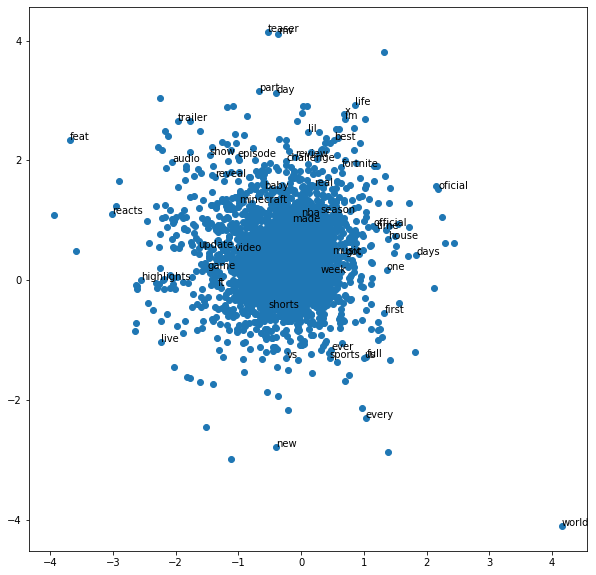

In [36]:
# Visualize word embedding
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

word_vectors = title_model.wv[title_model.wv.index_to_key]

plt.figure(figsize=(10, 10))
plt.scatter(word_vectors[:, 0], word_vectors[:, 1])

# Annotate some points
words = list(title_model.wv.index_to_key[:50])
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors[i, 0], word_vectors[i, 1]))

plt.show()

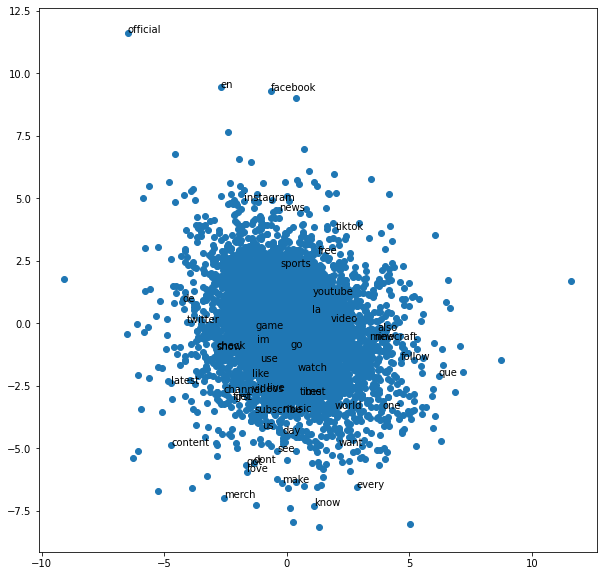

In [37]:
# Visualize word embedding
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality of word vectors
word_vectors = description_model.wv[description_model.wv.index_to_key]

plt.figure(figsize=(10, 10))
plt.scatter(word_vectors[:, 0], word_vectors[:, 1])

# Annotate some points
words = list(description_model.wv.index_to_key[:50])
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors[i, 0], word_vectors[i, 1]))

plt.show()

In [21]:
pip install textblob nltk

     |████████████████████████████████| 626 kB 7.2 MB/s eta 0:00:01
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

textblob 0.18.0.post0 requires nltk>=3.8, but you'll have nltk 3.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [45]:
# TextBlob sentiment analyzer (title)

from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['textblob_title_sentiment'] = df['title'].apply(get_sentiment)

df[['title', 'textblob_title_sentiment']].head(25)

,title,title_sentiment
0,I ASKED HER TO BE MY GIRLFRIEND...,0.000000
1,Apex Legends | Stories from the Outlands – “Th...,0.000000
2,I left youtube for a month and THIS is what ha...,0.000000
3,XXL 2020 Freshman Class Revealed - Official An...,0.000000
4,Ultimate DIY Home Movie Theater for The LaBran...,0.000000
5,I Haven't Been Honest About My Injury.. Here's...,0.600000
6,OUR FIRST FAMILY INTRO!!,0.390625
7,CGP Grey was WRONG,-0.275000
8,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,1.000000
9,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,0.000000


In [52]:
# VADER sentiment analyzer (title)

from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    return sia.polarity_scores(text)['compound']

df['vader_title_sentiment'] = df['title'].apply(get_vader_sentiment)

print(df[['title', 'vader_title_sentiment']].head(25))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lauren/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                title  vader_title_sentiment
0                  I ASKED HER TO BE MY GIRLFRIEND...                 0.0000
1   Apex Legends | Stories from the Outlands – “Th...                 0.0000
2   I left youtube for a month and THIS is what ha...                 0.0000
3   XXL 2020 Freshman Class Revealed - Official An...                 0.0000
4   Ultimate DIY Home Movie Theater for The LaBran...                 0.0000
5   I Haven't Been Honest About My Injury.. Here's...                 0.0852
6                            OUR FIRST FAMILY INTRO!!                 0.0000
7                                  CGP Grey was WRONG                -0.5622
8   SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...                 0.7311
9   Ovi x Natanael Cano x Aleman x Big Soto - Veng...                 0.0000
10                 i don't know what im doing anymore                 0.0000
11                     Try Not To Laugh Challenge #51                -0.4847

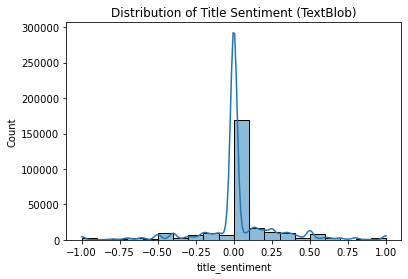

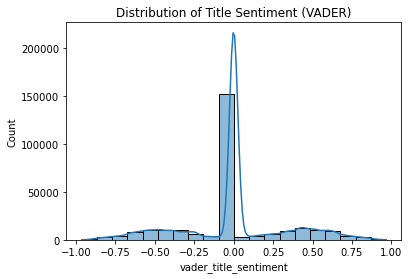

In [24]:
# Sentiment score plots (title)

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['textblob_title_sentiment'], kde=True)
plt.title("Distribution of Title Sentiment (TextBlob)")
plt.show()

sns.histplot(df['vader_title_sentiment'], kde=True)
plt.title("Distribution of Title Sentiment (VADER)")
plt.show()

### Result -- not very helpful
# Most titles had either very polarized sentiment scores or scores of 0 (no sentiment) despite them clearly
# having them when manually checking. This means the libaries used were insufficient in capturing the 
# significance and semantic meaning of Youtube titles but there does not appear to be a widely used/specialized
# enough library for the purposes of our task.


In [58]:
# TextBlob sentiment analyzer (description)

from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

df['textblob_description_sentiment'] = df['description'].apply(get_sentiment)

df[['title', 'description', 'textblob_description_sentiment']].head(25)

,title,description,textblob_description_sentiment
0,I ASKED HER TO BE MY GIRLFRIEND...,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,0.052083
1,Apex Legends | Stories from the Outlands – “Th...,"While running her own modding shop, Ramya Pare...",0.442857
2,I left youtube for a month and THIS is what ha...,I left youtube for a month and this is what ha...,0.000000
3,XXL 2020 Freshman Class Revealed - Official An...,Subscribe to XXL → http://bit.ly/subscribe-xxl...,-0.125000
4,Ultimate DIY Home Movie Theater for The LaBran...,Transforming The LaBrant Family's empty white ...,0.109411
5,I Haven't Been Honest About My Injury.. Here's...,Subscribe To My Channel - https://www.youtube....,0.211217
6,OUR FIRST FAMILY INTRO!!,Hi babygirls! Thank you so much for watching ...,0.372266
7,CGP Grey was WRONG,‣ What Was TEKOI: https://www.youtube.com/watc...,0.100000
8,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,"Since I was little, i've had these goals for m...",0.294345
9,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,Vengo De Nada - Ovi x Natanael Cano x Aleman x...,0.000000


In [60]:
# VADER sentiment analyzer (description)

from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    return sia.polarity_scores(str(text))['compound']

df['vader_description_sentiment'] = df['description'].apply(get_vader_sentiment)

print(df[['title', 'description', 'vader_description_sentiment']].head(25))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lauren/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                title  \
0                  I ASKED HER TO BE MY GIRLFRIEND...   
1   Apex Legends | Stories from the Outlands – “Th...   
2   I left youtube for a month and THIS is what ha...   
3   XXL 2020 Freshman Class Revealed - Official An...   
4   Ultimate DIY Home Movie Theater for The LaBran...   
5   I Haven't Been Honest About My Injury.. Here's...   
6                            OUR FIRST FAMILY INTRO!!   
7                                  CGP Grey was WRONG   
8   SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...   
9   Ovi x Natanael Cano x Aleman x Big Soto - Veng...   
10                 i don't know what im doing anymore   
11                     Try Not To Laugh Challenge #51   
12  Rainbow Six Siege: Operation Shadow Legacy Rev...   
13   Lil Yachty & Future - Pardon Me (Official Video)   
14  When Our Generation Gets Old and Hears a Throw...   
15               Ten Minutes with Tyler Cameron | Q&A   
16  Kylie Jenner Reacts To 'WAP

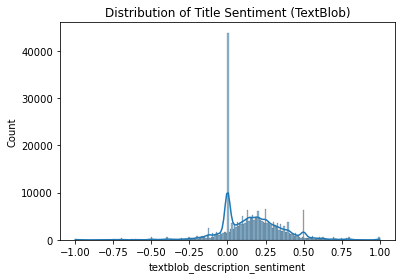

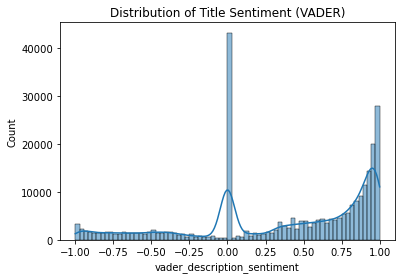

In [61]:
# Sentiment score plots (description)

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['textblob_description_sentiment'], kde=True)
plt.title("Distribution of Title Sentiment (TextBlob)")
plt.show()

sns.histplot(df['vader_description_sentiment'], kde=True)
plt.title("Distribution of Title Sentiment (VADER)")
plt.show()

### Result -- not very helpful
pretty similar to titles

In [63]:
# Sentiment classification (title + description)
    # current (arbitrary) threshold set at 0.01 both ways

def categorize_sentiment(score):
    if score > 0.01:
        return 'positive'
    elif score < -0.01:
        return 'negative'
    else:
        return 'neutral'

df['textblob_title_valence'] = df['title_sentiment'].apply(categorize_sentiment)
df['vader_title_valence'] = df['vader_title_sentiment'].apply(categorize_sentiment)

df['textblob_description_valence'] = df['textblob_description_sentiment'].apply(categorize_sentiment)
df['vader_description_valence'] = df['vader_description_sentiment'].apply(categorize_sentiment)

print(df[['title', 'textblob_title_valence', 'vader_title_valence', 'textblob_description_valence', 'vader_description_valence']].head(50))


                                                title textblob_title_valence  \
0                  I ASKED HER TO BE MY GIRLFRIEND...                neutral   
1   Apex Legends | Stories from the Outlands – “Th...                neutral   
2   I left youtube for a month and THIS is what ha...                neutral   
3   XXL 2020 Freshman Class Revealed - Official An...                neutral   
4   Ultimate DIY Home Movie Theater for The LaBran...                neutral   
5   I Haven't Been Honest About My Injury.. Here's...               positive   
6                            OUR FIRST FAMILY INTRO!!               positive   
7                                  CGP Grey was WRONG               negative   
8   SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...               positive   
9   Ovi x Natanael Cano x Aleman x Big Soto - Veng...                neutral   
10                 i don't know what im doing anymore                neutral   
11                     Try Not To Laugh 